In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [10]:
# CNN 입력 구조: 4차원: Batch x Heigh x Width x Channel

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [12]:
# 28 x 28 shape를 CNN 모델에 입력으로 주기 위해 28 x 28 x 1 shape 변경: 채널 추가

# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5), strides = (1,1), padding = 'same',
                activation='relu',
                input_shape = (28, 28, 1))) # 28 x 28 x 32
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) # 14 x 14 x 32
model.add(Conv2D(64, (2, 2), activation='relu', padding = 'same')) #14 x 14 x 64
model.add(MaxPooling2D(pool_size = (2, 2))) # 7 x 7 x 64
model.add(Dropout(0.2))
model.add(Flatten()) # 3136
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,914 (1.57 MB)

 Trainable params: 411,914 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# 모델 입력
model.input_shape

(None, 28, 28, 1)

In [36]:
model.output_shape

(None, 10)

In [28]:
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Dropout name=dropout, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_1, built=True>]

In [38]:
model.layers[0]

<Conv2D name=conv2d_2, built=True>

In [40]:
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor>

In [44]:
# 모델 첫 번째 레이어 Cov2D의 출력: 32개 필터 출력
model.layers[0].output

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>

In [48]:
# 모델 첫 번째 레이어 Conv2D의 커널 가중치 계산
# 1) shape = (5, 5, 1, 32) 의미: 5 x 5 커널에 대해 input 채널 1개, output 채널 32개(Feature Map) -> 5 x 5 x 1 x 32 크기의 파라미터
# 2) shape = (32, ) 의미: 32개 출력 bias 파라미터
# 첫 번째 Conv2D 레이어는 800 + 32 = 832 파라미터 생성
model.layers[0].weights

[<Variable path=sequential_2/conv2d_2/kernel, shape=(5, 5, 1, 32), dtype=float32, value=[[[[ 0.02832044 -0.0791266   0.05291848 -0.07525799  0.01817656
     -0.00155057  0.05782741 -0.0800917   0.03412904 -0.04910656
      0.07207231 -0.05431525  0.07850803  0.01188567 -0.00907926
     -0.02374532  0.06997778 -0.01511462 -0.02318815  0.03399444
      0.00956412  0.03223733 -0.00537892  0.03504609 -0.07643097
     -0.01712523 -0.04198123  0.01187195  0.01158656 -0.04073357
      0.06757443  0.06515259]]
 
   [[ 0.07398343 -0.07350379  0.0439357   0.04178128 -0.07541709
      0.03505711 -0.06075857  0.06369334 -0.01161052 -0.00915033
     -0.01914588 -0.03112373 -0.03057103  0.03317335  0.07094698
     -0.06740196 -0.06129923 -0.05857491 -0.05800927 -0.00228611
      0.06479801  0.02058243  0.00986651  0.02992359  0.05143312
     -0.06537982  0.07306433  0.02104237 -0.08047224  0.01988512
     -0.01937875 -0.07358135]]
 
   [[-0.07973979 -0.08517655  0.01315864 -0.07758075  0.02237416
  

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,914 (1.57 MB)

 Trainable params: 411,914 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# 'conv2d_3' 이름으로 레이어 접근하기
model.get_layer('conv2d_3')

<Conv2D name=conv2d_3, built=True>

In [56]:
# 'conv2d_3' 이름으로 레이어 접근하기
model.get_layer('conv2d_3').input

<KerasTensor shape=(None, 14, 14, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_5>

In [58]:
# 'conv2d_3' 이름으로 레이어 접근하기
model.get_layer('conv2d_3').output

<KerasTensor shape=(None, 14, 14, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_6>

In [60]:
# 모델 compile
# to_categorical: Transforms an integer class vector into a one-hot encoded matrix
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [62]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [66]:
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy', # one hot encoding 미리 안해줬으면 sparse 추가
             metrics = ['accuracy'])

In [68]:
EPOCHS = 5
BATCH_SIZE = 1024

In [70]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [72]:
es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose= 1)

In [74]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6183 - loss: 1.2596
Epoch 1: val_accuracy improved from -inf to 0.94830, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.6210 - loss: 1.2507 - val_accuracy: 0.9483 - val_loss: 0.1743
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9403 - loss: 0.1982 
Epoch 2: val_accuracy improved from 0.94830 to 0.97490, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9404 - loss: 0.1977 - val_accuracy: 0.9749 - val_loss: 0.0829
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9673 - loss: 0.1130
Epoch 3: val_accuracy improved from 0.97490 to 0.98070, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.9674 - loss: 0.1128 - val_accuracy: 0.9807 - val_loss: 0.0598
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9752 - loss: 0.0834
Epoch 4: val_accuracy improved from 0.98070 to 0.98430, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.9752 - loss: 0.0834 - val_accuracy: 0.9843 - val_loss: 0.0474
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9791 - loss: 0.0674 
Epoch 5: val_accuracy improved from 0.98430 to 0.98660, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9791 - loss: 0.0675 - val_accuracy: 0.9866 - val_loss: 0.0402


In [76]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.0488 


[0.04019422456622124, 0.9865999817848206]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
# It tells Jupyter Notebook to display Matplotlib plots directly below the code cell that produces them

In [78]:
x_range = range(1, len(history.history['accuracy'])+1)
# history.history['accuracy']: List of accuracy values recorded at the end of each training epoch
# len(history.history['accuracy']): Gives the number of epochs that were run

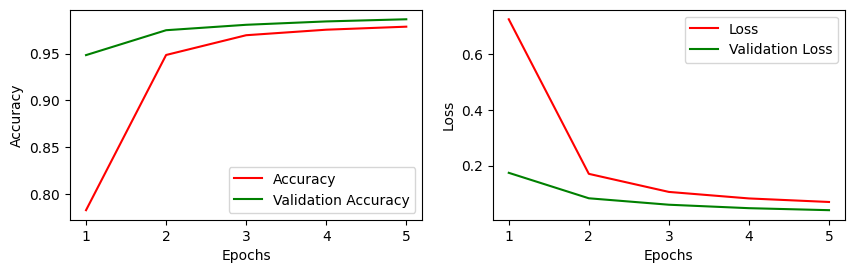

In [80]:
plt.figure(figsize = (10, 6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color = 'red', label = "Accuracy")
plt.plot(x_range, history.history['val_accuracy'], color = 'green', label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color = 'red', label = "Loss")
plt.plot(x_range, history.history['val_loss'], color = 'green', label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

In [82]:
x_test[0].shape

(28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction Probability:  [[1.08446137e-07 1.97635742e-07 1.14662835e-05 1.51785407e-05
  1.90123099e-08 1.45819694e-08 4.72081541e-10 9.99957919e-01
  2.11859188e-07 1.49822181e-05]]
The Answer is  [7]


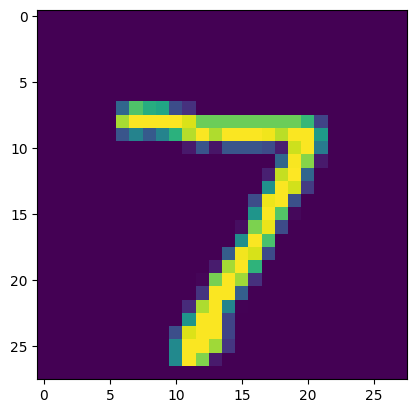

In [86]:
n = 0
plt.imshow(x_test[n].reshape(28, 28))
plt.show

pred = model.predict(x_test[n].reshape(1, 28, 28, 1))
answer = np.argmax(pred, axis = -1)

print('Prediction Probability: ', pred)
print("The Answer is ", answer)